# House Price Prediction

This notebook performs Exploratory Data Analysis (EDA), cleaning, feature preprocessing, and modeling on `regression_dataset.csv`.

**Type:** Regression


## 1. Imports & setup

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


## 2. Load & preview data

In [7]:
# Load dataset
df = pd.read_csv('regression_dataset.csv')
#print tail
print(df.tail())
#print data shape
print("Data shape:", df.shape)

     num_rooms    area_sqft  age_years  distance_km  num_bathrooms  \
995          4   511.266900       15.0     0.833193            4.0   
996          2   798.119197      116.0     4.767679            4.0   
997          7  1693.575334       30.0    24.593447            3.0   
998          3  1978.330806       27.0     4.225679            3.0   
999          1  1676.024803        6.0    12.470941            NaN   

     has_garden  near_school          price  
995           0            1  121110.632211  
996           0            0   74411.174231  
997           0            1  230369.437632  
998           0            0  259500.782051  
999           0            0  185919.266680  
Data shape: (1000, 8)


## 3. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_rooms      1000 non-null   int64  
 1   area_sqft      886 non-null    float64
 2   age_years      869 non-null    float64
 3   distance_km    896 non-null    float64
 4   num_bathrooms  886 non-null    float64
 5   has_garden     1000 non-null   int64  
 6   near_school    1000 non-null   int64  
 7   price          1000 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 62.6 KB
None
         num_rooms    area_sqft   age_years  distance_km  num_bathrooms  \
count  1000.000000   886.000000  869.000000   896.000000     886.000000   
mean      3.911000  1524.125922   57.703107     9.977162       2.490971   
std       2.009756   751.399736   35.127211     9.741657       1.157353   
min       1.000000   200.000000    0.000000     0.010298       1.000000   
25%       2.000000   953

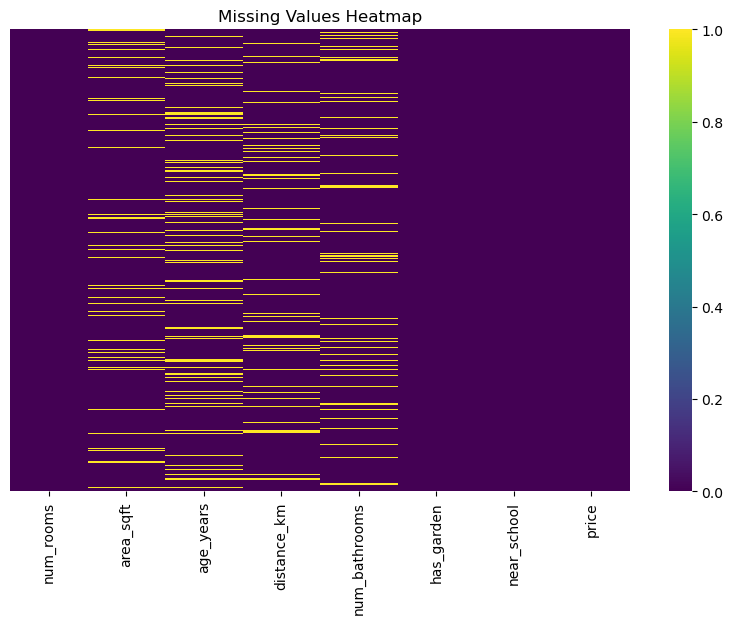

In [10]:
# Basic EDA
print(df.info())
print(df.describe())
# Missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 4. Data Cleaning & Preprocessing

In [17]:
# Handle missing values and scale features
numeric_features = ['num_rooms', 'area_sqft', 'age_years', 'distance_km', 'num_bathrooms']
categorical_features = ['has_garden', 'near_school']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## 5. Modeling & Evaluation

C:\Users\PC\.conda\envs\ml_env\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


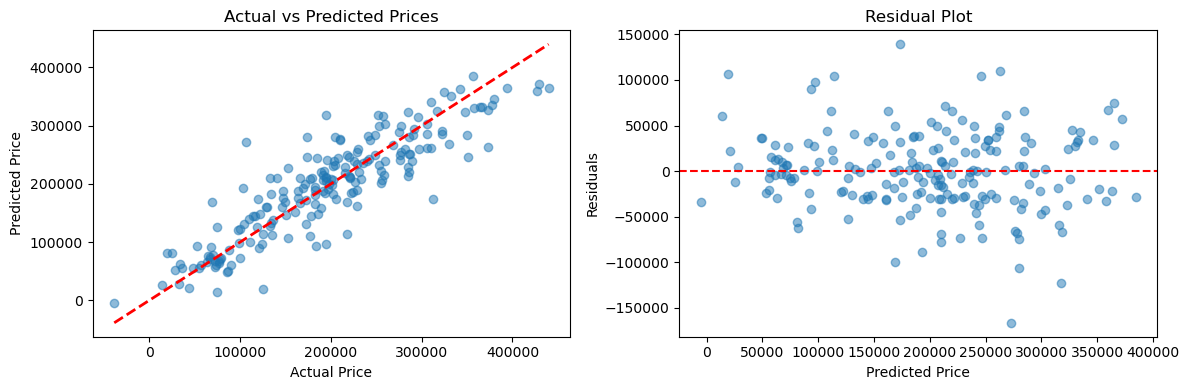

In [16]:
# Train/test split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()